In [1]:
import pandas as pd
import numpy as np

In [2]:
uni_data_df = pd.read_csv('../nba_forecast/data/last_ncaa_season.csv')

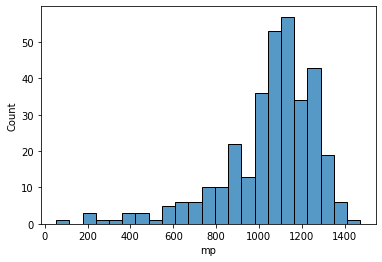

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.histplot(uni_data_df['mp'])
scaler = StandardScaler()
scaler.fit(uni_data_df[['mp']]) # Fit scaler to data

uni_data_df['mp'] = scaler.transform(uni_data_df[['mp']]) # Use scaler to transform data

In [27]:
df_explo = uni_data_df.drop(columns=['school_name','conf_abbr','player_id','player_name', 'season'])

In [28]:
df_explo.head()

,g,gs,mp,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,...,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,years
0,40,40,1.028759,35.1,0.654,0.628,0.059,0.602,550.0,11.6,...,8.6,18.8,5.9,4.1,9.9,0.310,9.1,8.1,17.2,1
1,40,39,0.869182,21.2,0.570,0.511,0.156,0.589,497.0,10.3,...,17.3,20.6,3.4,2.6,6.0,0.192,4.1,3.6,7.7,1
2,37,37,0.966701,22.0,0.575,0.525,0.473,0.440,522.0,4.8,...,14.3,23.0,3.6,2.1,5.7,0.180,5.4,2.9,8.4,1
3,37,0,-0.699996,26.3,0.565,0.534,0.317,0.331,430.0,2.4,...,10.4,26.7,3.2,1.7,5.0,0.223,6.0,4.8,10.8,2
4,39,39,0.855883,27.4,0.549,0.512,0.027,0.462,660.0,11.1,...,14.2,30.0,3.7,3.5,7.2,0.231,5.4,3.4,8.8,3


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_explo.columns

In [39]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_explo.values, i)
                          for i in range(len(df_explo.columns))]
  
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
23,bpm,34652.529693
21,obpm,15487.943900
19,ws,12642.075674
17,ows,5263.816235
22,dbpm,5155.168823
11,trb_pct,4114.354438
4,ts_pct,2583.725482
10,drb_pct,2083.105529
3,per,1791.244522
18,dws,1688.622099


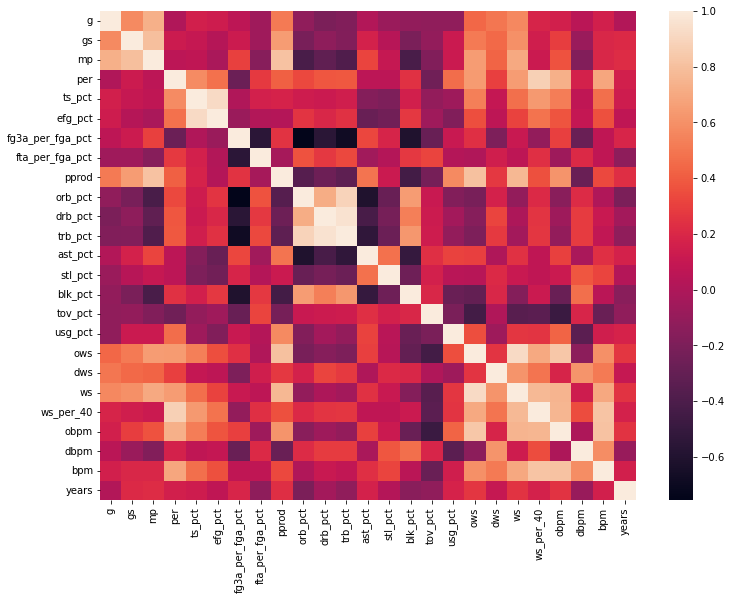

In [37]:
a4_dims = (12, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_explo.corr());

## KMEANS

In [4]:
test_df=uni_data_df.drop(columns=['school_name','conf_abbr'])

In [5]:
test_df = test_df.fillna(-1)

In [6]:
# Fit a K-MEANS
X_proj = test_df.drop(columns=['player_id','player_name', 'season'])
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X_proj)

KMeans(n_clusters=2)

In [7]:
km.cluster_centers_.shape

(2, 25)

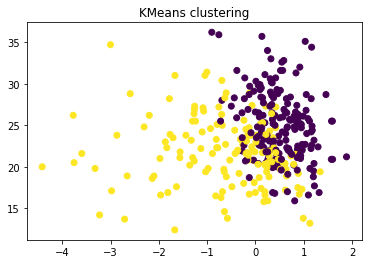

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_proj.iloc[:,2], X_proj.iloc[:,3], c=km.labels_)
plt.title('KMeans clustering');

In [9]:
len(X_proj.columns)

25

## PCA

In [10]:
#⚠️ Data must be centered around their mean before apply PCA ⚠️
scaler = StandardScaler()
scaler.fit(X_proj)
X_standard = pd.DataFrame(scaler.transform(X_proj), columns=X_proj.columns)
X_standard

,g,gs,mp,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,...,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,years
0,1.222250,1.034678,1.028759,2.668634,1.730719,1.765677,-1.228678,1.311577,0.387539,1.168637,...,-1.518829,-1.407264,2.060295,3.324383,2.976111,2.628326,1.602427,3.085636,3.106535,-1.200523
1,1.222250,0.919522,0.869182,-0.525581,-0.194696,-0.608936,-0.686537,1.218733,0.020800,0.854210,...,1.061360,-0.974193,0.176016,1.074294,0.583836,0.014986,-0.531586,0.421510,-0.185398,-1.200523
2,0.629465,0.689211,0.966701,-0.341741,-0.080088,-0.324794,1.085202,0.154598,0.193790,-0.476058,...,0.171640,-0.396765,0.326759,0.324264,0.399814,-0.250778,0.023257,0.007090,0.057165,-1.200523
3,0.629465,-3.571552,-0.699996,0.646397,-0.309305,-0.142132,0.213305,-0.623864,-0.442813,-1.056538,...,-0.984997,0.493435,0.025274,-0.275759,-0.029568,0.701541,0.279338,1.131943,0.888812,-0.372063
4,1.024655,0.919522,0.855883,0.899177,-0.676050,-0.588640,-1.407528,0.311718,1.148695,1.047703,...,0.141982,1.287398,0.402130,2.424347,1.319920,0.878717,0.023257,0.303104,0.195773,0.456397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.431870,0.343743,-0.238994,0.485538,-0.240540,0.182602,-1.245445,-0.573871,-0.290582,1.555624,...,-0.065619,-0.420825,-0.577695,0.774282,-0.152249,0.037133,-0.531586,0.717524,-0.012139,0.456397
330,-0.160916,-0.692658,0.066862,0.048918,-0.584364,-0.487161,0.772214,-1.152361,0.899590,0.297916,...,-0.273221,1.527993,-0.426953,0.174258,-0.274930,-0.383660,-0.104784,-1.472980,-0.947741,1.284858
331,-0.160916,0.228588,0.208709,-0.732400,-0.034245,0.223193,0.313909,-1.745135,-0.553527,0.563970,...,-1.518829,-1.671918,-0.276210,-0.275759,-0.336270,-0.649423,-0.360865,-0.940155,-0.843785,1.284858
332,-0.358511,-0.001724,-0.602476,-1.077100,-0.103010,0.020235,1.191395,-1.038092,-0.761115,0.104423,...,0.408899,-0.324587,-1.105293,-0.875783,-1.256376,-1.313832,-0.915709,-0.762546,-1.224956,1.284858


<AxesSubplot:>

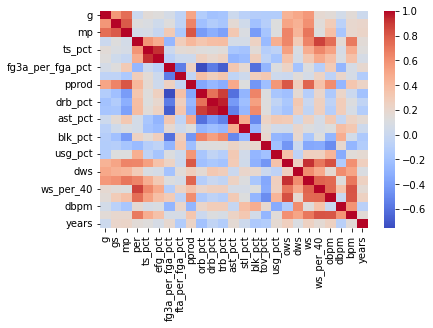

In [11]:
sns.heatmap(pd.DataFrame(X_proj).corr(), cmap='coolwarm')

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_standard)

PCA()

In [13]:
# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=X_proj.columns,
                 columns=[f'PC{i}' for i in range(1, 26)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
g,-0.185304,-0.027307,-0.298539,-0.372359,0.115114,-0.038732,0.162686,0.081917,-0.144937,-0.088570,...,0.487679,-0.046196,0.104057,0.041594,-0.046650,0.048554,-0.058539,-0.003003,-0.004637,0.000083
gs,-0.222292,-0.059323,-0.260954,-0.284309,-0.095161,-0.010312,-0.127828,-0.111546,0.052155,0.303567,...,0.387797,0.027181,-0.060395,0.031724,-0.025652,-0.019083,-0.013181,-0.004023,0.001023,-0.000978
mp,-0.263893,-0.142405,-0.249792,-0.275226,-0.047198,-0.023579,-0.035063,-0.066433,0.073967,0.071872,...,-0.406250,-0.097308,0.191844,-0.086938,0.596446,0.090436,0.319407,-0.010666,0.017967,-0.009062
per,-0.228891,0.267287,0.161131,0.152346,-0.173637,-0.033531,0.016799,-0.036835,-0.125663,0.191360,...,0.156603,-0.083241,0.251415,-0.090086,0.407947,-0.303440,-0.591944,-0.033287,-0.024173,0.004432
ts_pct,-0.176215,0.201573,0.252321,-0.099001,0.291061,-0.364543,-0.069542,-0.047113,0.064815,0.024335,...,0.029574,0.017038,0.015314,-0.597218,-0.064061,0.443561,-0.049751,0.039306,0.006896,-0.000317
efg_pct,-0.112607,0.219993,0.242095,-0.157684,0.345153,-0.312374,-0.105755,-0.207590,-0.026491,0.165787,...,-0.120803,-0.257763,-0.191428,0.533534,0.034023,-0.195096,0.096583,-0.012555,-0.003461,-0.002253
fg3a_per_fga_pct,-0.117218,-0.287620,0.159685,0.050312,0.266358,0.152439,-0.078905,-0.189970,0.097355,-0.210676,...,0.158050,-0.182935,-0.230899,0.058269,0.158120,-0.049625,-0.097546,0.002002,-0.003078,0.000649
fta_per_fga_pct,0.020911,0.190380,-0.135384,0.102806,-0.252207,-0.444084,0.186701,0.538718,0.321530,-0.142353,...,0.005569,-0.203450,-0.054652,0.141878,0.009650,-0.031324,-0.005772,-0.007391,-0.003503,-0.001437
pprod,-0.312550,-0.100556,-0.057273,-0.091033,-0.274728,-0.099793,0.035111,-0.118932,-0.117132,0.068091,...,-0.232527,-0.054516,-0.430682,-0.364049,-0.349927,-0.466443,0.010707,0.003722,-0.003544,0.007390
orb_pct,0.117745,0.347455,-0.001723,-0.118320,-0.150481,0.053953,0.064176,-0.054407,0.139720,0.179498,...,-0.085326,-0.186006,-0.348422,-0.056213,0.150239,0.170371,-0.016333,0.347096,0.035578,-0.007353


In [14]:
X_proj_pca = pca.transform(X_standard)
X_proj_pca = pd.DataFrame(X_proj_pca, columns=[f'PC{i}' for i in range(1, 26)])
X_proj_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-5.054112,7.264500,-2.448993,-0.022362,2.110584,0.923537,1.587151,0.538809,-0.749382,0.411801,...,-0.405680,-0.328619,0.141602,0.319205,-0.134279,0.172646,-0.257319,-0.030018,0.020764,-0.001361
1,0.105513,0.835457,-2.579295,-1.368876,-0.241135,-0.745711,1.099520,0.074870,0.736659,-0.479668,...,-0.101277,0.394697,0.102285,-0.068997,0.128984,0.057482,-0.046150,-0.009878,0.006014,-0.006689
2,-0.630654,-0.553260,-1.065429,-0.646975,0.317763,0.166198,0.841835,-0.919188,0.717971,-0.247247,...,0.130474,0.197564,0.196490,0.087140,0.147246,0.027075,0.036536,0.062804,0.008341,0.019929
3,-0.445487,-1.084795,0.590643,3.551187,1.676751,0.709117,1.610509,0.858673,-0.359193,0.520790,...,-0.192961,0.112860,0.409269,0.069697,0.219283,0.009352,-0.045897,0.001077,-0.057767,0.006039
4,-1.768888,2.932219,-2.266123,-0.887649,-2.818280,1.451358,-0.804242,-0.887833,0.446698,-0.671914,...,0.024587,0.144819,0.067674,0.048699,-0.164115,-0.014649,0.029590,0.023886,-0.003911,-0.003951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.823200,2.142436,-1.284972,-0.191117,-0.002486,0.909692,-0.609001,-0.261709,0.017400,1.481151,...,0.289885,-0.213781,-0.150151,-0.172371,-0.035437,0.036239,-0.068767,-0.031999,-0.010777,0.001363
330,0.182536,-1.083697,1.054679,-0.393840,-1.732706,1.206279,-1.379350,-0.662861,-0.159300,0.098278,...,-0.229370,-0.547444,-0.131137,-0.248800,-0.215586,-0.053758,0.045603,-0.009770,-0.009144,0.006781
331,1.269981,0.192596,1.021879,-2.396440,0.632996,2.006378,-1.654224,-0.544455,1.190067,-0.256813,...,0.185994,-0.334745,-0.208144,-0.259044,-0.091551,0.043930,0.016609,-0.032692,-0.009929,0.001615
332,2.766997,-0.887091,1.100333,-1.443219,0.160147,0.630711,-2.092107,-0.743430,0.413161,-0.494862,...,0.457063,0.020982,-0.305397,-0.110760,0.043173,-0.016041,-0.146967,-0.001667,-0.007895,-0.022379


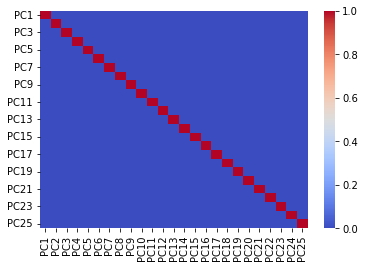

In [15]:
sns.heatmap(X_proj_pca.corr(), cmap='coolwarm');

In [16]:
# Let's compute it
X_proj_pca.std()**2 / ((X_standard.std()**2).sum())

PC1     0.290103
PC2     0.224507
PC3     0.097333
PC4     0.087484
PC5     0.071784
PC6     0.051967
PC7     0.039305
PC8     0.027152
PC9     0.021851
PC10    0.018074
PC11    0.015781
PC12    0.014868
PC13    0.009763
PC14    0.008582
PC15    0.006796
PC16    0.005394
PC17    0.003597
PC18    0.002522
PC19    0.001309
PC20    0.000786
PC21    0.000650
PC22    0.000327
PC23    0.000042
PC24    0.000019
PC25    0.000005
dtype: float64

> 29% of the dataset’s variance lies along the first axis

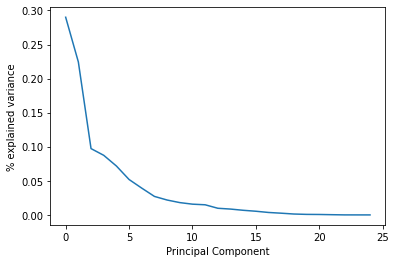

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

Choose k

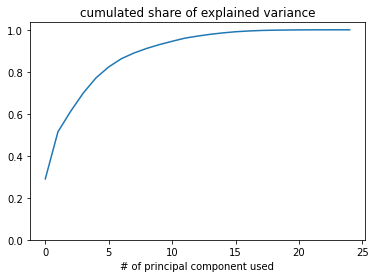

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [20]:
# Fit a PCA with only 4 components
pca4 = PCA(n_components=4).fit(X_standard)

# Project your data into 4 dimensions
X_proj4 = pd.DataFrame(pca4.fit_transform(X_standard), columns=['PC1', 'PC2', 'PC3','PC4'])

# We have "compressed" our dataset in 3D
X_proj4

,PC1,PC2,PC3,PC4
0,-5.054112,7.264500,-2.448993,-0.022362
1,0.105513,0.835457,-2.579295,-1.368876
2,-0.630654,-0.553260,-1.065429,-0.646975
3,-0.445487,-1.084795,0.590643,3.551187
4,-1.768888,2.932219,-2.266123,-0.887649
...,...,...,...,...
329,0.823200,2.142436,-1.284972,-0.191117
330,0.182536,-1.083697,1.054679,-0.393840
331,1.269981,0.192596,1.021879,-2.396440
332,2.766997,-0.887091,1.100333,-1.443219


In [23]:
pca4.components_
# Print PCs as COLUMNS
W = pd.DataFrame(pca4.components_.T,
                 index=X_proj.columns,
                 columns=[f'PC{i}' for i in range(1, 5)])
W

,PC1,PC2,PC3,PC4
g,-0.185304,-0.027307,-0.298539,-0.372359
gs,-0.222292,-0.059323,-0.260954,-0.284309
mp,-0.263893,-0.142405,-0.249792,-0.275226
per,-0.228891,0.267287,0.161131,0.152346
ts_pct,-0.176215,0.201573,0.252321,-0.099001
efg_pct,-0.112607,0.219993,0.242095,-0.157684
fg3a_per_fga_pct,-0.117218,-0.287620,0.159685,0.050312
fta_per_fga_pct,0.020911,0.190380,-0.135384,0.102806
pprod,-0.312550,-0.100556,-0.057273,-0.091033
orb_pct,0.117745,0.347455,-0.001723,-0.118320
